---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    readonly/train.csv - the training set (all tickets issued 2004-2011)
    readonly/test.csv - the test set (all tickets issued 2012-2016)
    readonly/addresses.csv & readonly/latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `readonly/train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `readonly/test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. You should NOT use Neural Network related classifiers (e.g., MLPClassifier) in this question. 

* Try to avoid global variables. If you have other functions besides blight_model, you should move those functions inside the scope of blight_model.

* Refer to the pinned threads in Week 4's discussion forum when there is something you could not figure it out.

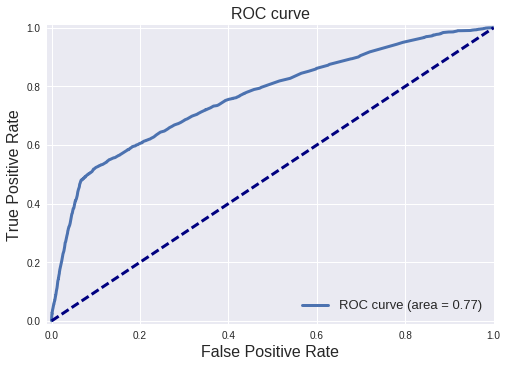

ticket_id
284932    0.062677
285362    0.020520
285361    0.065057
285338    0.083020
285346    0.074824
285345    0.063439
285347    0.059205
285342    0.428119
285530    0.020463
284989    0.030685
285344    0.075507
285343    0.033202
285340    0.028619
285341    0.065480
285349    0.064884
285348    0.056469
284991    0.030685
285532    0.033708
285406    0.030685
285001    0.019420
285006    0.019505
285405    0.020463
285337    0.030685
285496    0.075507
285497    0.083020
285378    0.020463
285589    0.030685
285585    0.056469
285501    0.068559
285581    0.019756
            ...   
376367    0.047140
376366    0.032600
376362    0.031488
376363    0.053919
376365    0.063579
376364    0.044204
376228    0.044450
376265    0.041649
376286    0.435287
376320    0.044204
376314    0.035805
376327    0.347454
376385    0.347454
376435    0.625753
376370    0.338985
376434    0.059311
376459    0.082463
376478    0.009717
376473    0.036580
376484    0.019024
376482    0.025790
37

In [13]:
def blight_model():
    
    import sys
    import warnings

    if not sys.warnoptions:                       # ignore minor warnings while code is running
        warnings.simplefilter("ignore")
    
    import pandas as pd
    import numpy as np
    import datetime as dt
    import matplotlib.pyplot as plt

    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.metrics import confusion_matrix,roc_curve, auc
    
    train = pd.read_csv('train.csv',engine='python')
    
    # Select the columns in the train dataset that we will keep
    cols_to_keep = ['ticket_id','zip_code','violation_code','judgment_amount','compliance_detail','compliance']
    train = train[cols_to_keep]
    
    # Set 'ticket_id' as the row index
    train.set_index('ticket_id',inplace=True)
    
    # Delete rows in 'train' where no violation has occurred
    train = train[(train['compliance_detail'] != 'not responsible by disposition') & 
                  (train['compliance_detail'] != 'not responsible by pending judgment disposition')]
    
    # Clean up the target 'compliance' column
    train['compliance'] = 1 
    non_compliant = train['compliance_detail'].str.contains('non-compliant',regex=False)
    train['compliance'][non_compliant] = 0
    
    # Now we can get rid of the 'compliance_detail' column
    train.drop('compliance_detail', axis=1, inplace=True)
    
    # Recode the 'zip_code' column 
    train['zip_code'] = train['zip_code'].astype('str')
    
    # Find all rows where zip code does not start with '48'
    
    def recode_odd_ball_zips(df):
    
        good_zips = ['48227','48221','48235','48228','48219','48238','48224','48205',
                 '48204','48234','48206','48213','48223','48209','48203','48075',
                 '48210','48207','48202','48076','48214','48226','48212','48037',
                 '48034','48215','48237','48208','48126','48201','48126']
    
        odd_ball_zips = df.loc[~df['zip_code'].str.startswith(('48'))]  
    
        increment = int(len(odd_ball_zips)/len(good_zips))+1
    
        for i,zip_code in enumerate(good_zips):                             # populate 'rows['zip_code]' with zip codes from 'good_zips'
            odd_ball_zips['zip_code'][increment*i:increment*(i+1)] = zip_code
        
        df.update(odd_ball_zips)                                             # update the dataset with the recoded zip codes.
        
        return df
    
    train = recode_odd_ball_zips(train)

    # Convert columns of strings to coded categorical variables
    
    def categorical(series):
        series = series.astype('category')
        series = series.cat.codes
        return series
    
    train['zip_code'] = categorical(train['zip_code'])

    # Recode the 'violation_code' column and convert to coded categorical variable
    
    def recode_violation_code_column(df):
        
        df['violation_recode'] = 'other'
        code9_1 = df['violation_code'].str.startswith('9-1')
        df['violation_recode'][code9_1] = '9-1'
        code22_2 = df['violation_code'].str.startswith('22-2')
        df['violation_recode'][code22_2] = '22-2'
        code61 = df['violation_code'].str.startswith('61')
        df['violation_recode'][code61] = '61'
        code194 = df['violation_code'].str.startswith('194')
        df['violation_recode'][code194] = '194'
        df['violation_recode'] = df['violation_recode'].astype('category')
        df['violation_recode'] = df['violation_recode'].cat.codes
        df.drop('violation_code', axis=1, inplace=True)
        
        return df
    
    train = recode_violation_code_column(train)
    
    # Create the X and y dataframes
    X = train.drop(['compliance'],axis=1)
    y = train['compliance']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    # Set up the Gradient Boosting Classifier
    clf = GradientBoostingClassifier(learning_rate=0.5,max_depth=2,n_estimators=100,random_state = 0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr, tpr, lw=3, label='ROC curve (area = {:0.2f})'.format(roc_auc))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    # plt.axes().set_aspect('equal')
    plt.show()
    
    # Now, let's process the test dataset
    test = pd.read_csv('test.csv',engine='python')
    cols_to_keep = ['ticket_id','zip_code','violation_code','judgment_amount']
    test = test[cols_to_keep]
    
    ticket_id = test['ticket_id']                # save the 'ticket_id' column in test, we're going to need it later
    test.set_index('ticket_id',inplace=True)

    # Recode the 'zip_code' column
    test['zip_code'] = test['zip_code'].astype('str')
    test = recode_odd_ball_zips(test)
    test['zip_code'] = categorical(test['zip_code'])
    
    # Recode the 'violation_code' column 
    test = recode_violation_code_column(test)
    
    # Now get the probabilities of a '1' outcome using the 'proba' function
    y_probs = clf.fit(X_train, y_train).predict_proba(test)
    
    compliance = pd.Series(y_probs[:,1], index = ticket_id)   # create a pandas Series with the ticket_id as index'''
    
    return compliance

blight_model()